## Imports and Setup

In [1]:
import pandas as pd 
import numpy as np

In [2]:
raw_x = pd.read_csv("data/X_train.csv")
raw_y = pd.read_csv("data/y_train.csv")

In [3]:
raw_data = raw_x.copy()
raw_data["Regulated"] = raw_y["Regulated"]

In [4]:
#data is initially split it x and y, combine it into one df for cleaning
raw_data.head(5)

,chr,start,end,name,chrTSS,startTSS,endTSS,TargetGene,ReferenceID,CellType,...,normalizedDNase_enh,normalizedDNase_prom,numNearbyEnhancers,sumNearbyEnhancers,ubiquitousExpressedGene,3DContact,3DContact_squared,normalizedDNase_enh_squared,ABC.Score,Regulated
0,chr8,60284882,60285382,CA8|chr8:61197441-61197941:.,chr8,60281411.0,60281412.0,CA8,2f957f7a,K562,...,9.255186,0.691692,46,215.634522,0,11482.332360,1.318440e+08,85.658468,0.229877,True
1,chr9,99075179,99075797,TGFBR1|chr9:101837461-101838079:.,chr9,99104038.0,99104039.0,TGFBR1,2f957f7a,K562,...,18.483246,0.798897,98,1196.610723,0,1833.345234,3.361155e+06,341.630383,0.044430,True
2,chr7,134639833,134640333,BPGM|chr7:134324585-134325085:.,chr7,134646808.0,134646809.0,BPGM,2f957f7a,K562,...,6.521952,0.992838,48,65.289744,0,10744.950360,1.154540e+08,42.535858,0.053048,True
3,chr10,5472235,5472735,NET1|chr10:5514198-5514698:.,chr10,5412551.0,5412552.0,NET1,2f957f7a,K562,...,2.925616,0.755541,33,94.653009,0,1419.128316,2.013925e+06,8.559229,0.004903,True
4,chr4,55723369,55723869,NMU|chr4:56589536-56590036:.,chr4,55636697.0,55636698.0,NMU,2f957f7a,K562,...,0.979523,0.598229,29,21.614425,0,793.318224,6.293538e+05,0.959465,0.001483,True


## Data Cleaning

In [5]:
#check each columb for missing values
raw_data.isna().sum()
#when checking which class the missing values belong too, almost all of them belong to the regulated == False category
#this indicates that they could be features with high importance

chr                               0
start                             0
end                               0
name                              0
chrTSS                            0
startTSS                         70
endTSS                           70
TargetGene                        0
ReferenceID                       0
CellType                          0
EffectSize                        0
pValueAdjusted                   15
Significant                       0
PowerAtEffectSize25               6
PowerAtEffectSize10            2896
PowerAtEffectSize15            2896
PowerAtEffectSize20            2896
PowerAtEffectSize50            2896
distanceToTSS                     0
numTSSEnhGene                     0
numCandidateEnhGene               0
normalizedDNase_enh               0
normalizedDNase_prom              0
numNearbyEnhancers                0
sumNearbyEnhancers                0
ubiquitousExpressedGene           0
3DContact                         0
3DContact_squared           

In [6]:
#Checking for the prescence of missing values in "Regulated" = True
raw_data[raw_data["Regulated"]==True].isna().sum()

chr                             0
start                           0
end                             0
name                            0
chrTSS                          0
startTSS                        0
endTSS                          0
TargetGene                      0
ReferenceID                     0
CellType                        0
EffectSize                      0
pValueAdjusted                 14
Significant                     0
PowerAtEffectSize25             6
PowerAtEffectSize10            71
PowerAtEffectSize15            71
PowerAtEffectSize20            71
PowerAtEffectSize50            71
distanceToTSS                   0
numTSSEnhGene                   0
numCandidateEnhGene             0
normalizedDNase_enh             0
normalizedDNase_prom            0
numNearbyEnhancers              0
sumNearbyEnhancers              0
ubiquitousExpressedGene         0
3DContact                       0
3DContact_squared               0
normalizedDNase_enh_squared     0
ABC.Score     

In [7]:
#Checking for the prescence of missing values in "Regulated" = False
raw_data[raw_data["Regulated"]==False].isna().sum()

chr                               0
start                             0
end                               0
name                              0
chrTSS                            0
startTSS                         70
endTSS                           70
TargetGene                        0
ReferenceID                       0
CellType                          0
EffectSize                        0
pValueAdjusted                    1
Significant                       0
PowerAtEffectSize25               0
PowerAtEffectSize10            2825
PowerAtEffectSize15            2825
PowerAtEffectSize20            2825
PowerAtEffectSize50            2825
distanceToTSS                     0
numTSSEnhGene                     0
numCandidateEnhGene               0
normalizedDNase_enh               0
normalizedDNase_prom              0
numNearbyEnhancers                0
sumNearbyEnhancers                0
ubiquitousExpressedGene           0
3DContact                         0
3DContact_squared           

In [8]:
#based off this we are taking the deicison to drop columns missing startTSS, endTSS and pValueAdjusted
raw_data= raw_data.dropna(subset=['startTSS', 'endTSS', 'pValueAdjusted'])

In [9]:
# according to the compeition write up the PowerAtEffectSize__ Columns 15-19
#were "used to filter the dataset and are most likely not relevant", hence we will drop those columns
raw_data_cleaned = raw_data.drop(columns=["PowerAtEffectSize10",'PowerAtEffectSize25', 'PowerAtEffectSize15', 'PowerAtEffectSize20', 'PowerAtEffectSize50'])

## Feature Engineering

In [10]:
raw_data_cleaned.head()

,chr,start,end,name,chrTSS,startTSS,endTSS,TargetGene,ReferenceID,CellType,...,normalizedDNase_enh,normalizedDNase_prom,numNearbyEnhancers,sumNearbyEnhancers,ubiquitousExpressedGene,3DContact,3DContact_squared,normalizedDNase_enh_squared,ABC.Score,Regulated
0,chr8,60284882,60285382,CA8|chr8:61197441-61197941:.,chr8,60281411.0,60281412.0,CA8,2f957f7a,K562,...,9.255186,0.691692,46,215.634522,0,11482.332360,1.318440e+08,85.658468,0.229877,True
1,chr9,99075179,99075797,TGFBR1|chr9:101837461-101838079:.,chr9,99104038.0,99104039.0,TGFBR1,2f957f7a,K562,...,18.483246,0.798897,98,1196.610723,0,1833.345234,3.361155e+06,341.630383,0.044430,True
2,chr7,134639833,134640333,BPGM|chr7:134324585-134325085:.,chr7,134646808.0,134646809.0,BPGM,2f957f7a,K562,...,6.521952,0.992838,48,65.289744,0,10744.950360,1.154540e+08,42.535858,0.053048,True
3,chr10,5472235,5472735,NET1|chr10:5514198-5514698:.,chr10,5412551.0,5412552.0,NET1,2f957f7a,K562,...,2.925616,0.755541,33,94.653009,0,1419.128316,2.013925e+06,8.559229,0.004903,True
4,chr4,55723369,55723869,NMU|chr4:56589536-56590036:.,chr4,55636697.0,55636698.0,NMU,2f957f7a,K562,...,0.979523,0.598229,29,21.614425,0,793.318224,6.293538e+05,0.959465,0.001483,True


### extract number from "chr" and "chrTSS"

In [11]:
raw_data_cleaned["chr_cleaned"] = [string[3:] for string in raw_data_cleaned["chr"]]
raw_data_cleaned["chrTSS_cleaned"] = [string[3:] for string in raw_data_cleaned["chrTSS"]]

In [12]:
raw_data_cleaned = raw_data_cleaned.drop('chr', axis=1)
raw_data_cleaned = raw_data_cleaned.drop('chrTSS', axis=1)

In [13]:
raw_data_cleaned['chr_cleaned'] = pd.to_numeric(raw_data_cleaned['chr_cleaned'], errors='coerce')
raw_data_cleaned['chr_cleaned'] = raw_data_cleaned['chr_cleaned'].fillna(0)

In [14]:
raw_data_cleaned['chrTSS_cleaned'] = pd.to_numeric(raw_data_cleaned['chrTSS_cleaned'], errors='coerce')
raw_data_cleaned['chrTSS_cleaned'] = raw_data_cleaned['chrTSS_cleaned'].fillna(0)

### one hot encode "TargetGene"

In [15]:
one_hot_encoded_target_gene = pd.get_dummies(raw_data_cleaned, columns = ['TargetGene'])
one_hot_encoded_target_gene["TargetGene"] = raw_data_cleaned["TargetGene"]
raw_data_cleaned = one_hot_encoded_target_gene.copy()

In [16]:
raw_data_cleaned = raw_data_cleaned.drop('TargetGene', axis=1)

### one hot encode "ReferenceID"

In [17]:
one_hot_encoded_reference = pd.get_dummies(raw_data_cleaned, columns = ['ReferenceID'])
one_hot_encoded_reference["ReferenceID"] = raw_data_cleaned["ReferenceID"]
raw_data_cleaned = one_hot_encoded_reference.copy()

In [18]:
raw_data_cleaned = raw_data_cleaned.drop('ReferenceID', axis=1)

In [19]:
raw_data_cleaned.head(5)

,start,end,name,startTSS,endTSS,CellType,EffectSize,pValueAdjusted,Significant,distanceToTSS,...,TargetGene_ZNRD1,ReferenceID_0c4fc18d,ReferenceID_2f957f7a,ReferenceID_33564e49,ReferenceID_39b33148,ReferenceID_40e27e78,ReferenceID_8229577f,ReferenceID_a2f90cf9,ReferenceID_ac8d234e,ReferenceID_ebda246b
0,60284882,60285382,CA8|chr8:61197441-61197941:.,60281411.0,60281412.0,K562,-0.140258,0.000002,True,3767.5,...,0,0,1,0,0,0,0,0,0,0
1,99075179,99075797,TGFBR1|chr9:101837461-101838079:.,99104038.0,99104039.0,K562,-0.046138,0.004870,True,29655.5,...,0,0,1,0,0,0,0,0,0,0
2,134639833,134640333,BPGM|chr7:134324585-134325085:.,134646808.0,134646809.0,K562,-0.082180,0.007175,True,6687.0,...,0,0,1,0,0,0,0,0,0,0
3,5472235,5472735,NET1|chr10:5514198-5514698:.,5412551.0,5412552.0,K562,-0.100327,0.040277,True,25935.0,...,0,0,1,0,0,0,0,0,0,0
4,55723369,55723869,NMU|chr4:56589536-56590036:.,55636697.0,55636698.0,K562,-0.163492,0.000011,True,87281.0,...,0,0,1,0,0,0,0,0,0,0


## Train-Test Split

In [20]:
raw_data_cleaned = raw_data_cleaned.drop('CellType', axis=1)
raw_data_cleaned = raw_data_cleaned.drop('name', axis=1)

In [21]:
#import sklearn to split the data
from sklearn.model_selection import train_test_split

In [22]:
# Split into training data and the rest of the data (test + validation)
# 70% training, 30% (test + validation)
# stratified y variable to keep the proporiton of regulated to unregulated the same across each set
train, other = train_test_split(raw_data_cleaned, test_size=0.4, stratify=raw_data_cleaned['Regulated'])


In [23]:
# Split into test data and validation data
# 15% test + 15% validation
# stratified y variable to keep the proporiton of regulated to unregulated the same across each set
test, val = train_test_split(other, test_size=0.5,stratify=other['Regulated'])

## Baseline Models

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
X_train = train.drop('Regulated', axis=1)
y_train = train['Regulated']
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

X_test = test.drop('Regulated', axis=1)
y_test = test['Regulated']

y_pred_test = model.predict(X_test)

print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

Testing Accuracy: 0.9550898203592815


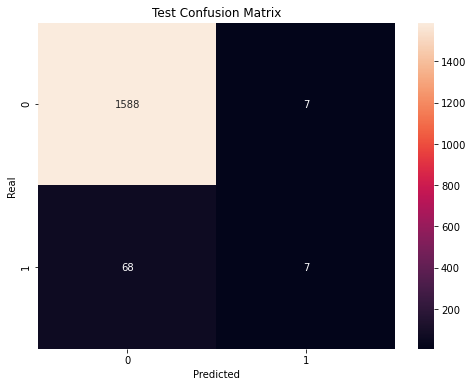

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d",)  
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Test Confusion Matrix')
plt.show()

In [28]:
X_val = val.drop('Regulated', axis=1)
y_val = val['Regulated']

y_pred_val = model.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_pred_val))

Validation Accuracy: 0.9598802395209581


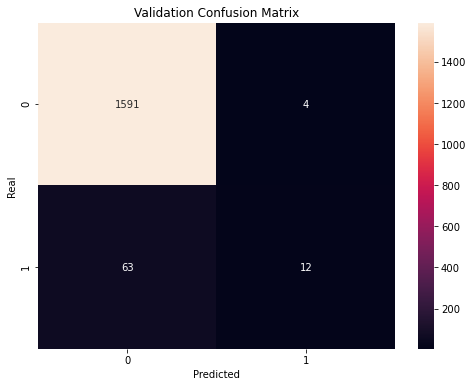

In [29]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
matrix = confusion_matrix(y_val, y_pred_val)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d",)  
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Validation Confusion Matrix')
plt.show()